In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from functools import reduce

%matplotlib inline

## Dataset from Dallas TX

#### Data from 2015 up to 2022 - broken down into fiscal years -

In [2]:
# each dataframe had to be collected individually.
# each dataframe had their own formating, but mostly with the same information
# attempting to join all the dataframe together...

In [3]:
dallas_2014_to_2015 = pd.read_csv('../data/Dallas_Animal_Shelter_Data_Fiscal_Year_2014_-_2015.csv', sep=',')
dallas_2014_to_2015 = dallas_2014_to_2015.drop(columns= ['Tag Type', 'Intake Total', 'Source Id','Impound Number', 'Activity Sequence','Kennel Number', 'Kennel Status', 'Activity Number', 'Census Tract', 'Council District', 'Staff Id', 'Receipt Number', 'Service Request Number'])
dallas_2014_to_2015

C:\Users\bruna\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0000575,CAT,DOMESTIC SH,STRAY,CONFINED,NaN,10/2/2014 0:00,12/31/1899 11:56:00 AM,10/6/2014 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,ADOPTION,ADOPTION,10/12/2014 0:00,12/31/1899 03:25:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,ADOPTED,OCT.2014,FY2015
1,A0008962,DOG,LABRADOR RETR,CONFISCATED,KEEP SAFE,NaN,9/24/2015 0:00,12/31/1899 03:50:00 PM,10/3/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,EUTHANIZED,10/4/2015 0:00,12/31/1899 12:22:00 PM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,SEP.2015,FY2015
2,A0121376,DOG,GERM SHEPHERD,STRAY,CONFINED,NaN,5/1/2015 0:00,12/31/1899 12:09:00 PM,5/2/2015 0:00,TREATABLE MANAGEABLE NON-CONTAGIOUS,NaN,EUTHANIZED,5/3/2015 0:00,12/31/1899 11:53:00 AM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,NaN,MAY.2015,FY2015
3,A0129114,CAT,DOMESTIC SH,OWNER SURRENDER,GENERAL,ALLERGIC,9/19/2015 0:00,12/31/1899 04:46:00 PM,9/22/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,EVERYDAY ADOPTION CENTER,ADOPTION,10/26/2015 0:00,12/31/1899 02:09:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,VOMIT 5X 9/20,SEP.2015,FY2015
4,A0157434,DOG,ROTTWEILER,OWNER SURRENDER,#NAME?,NaN,12/3/2014 0:00,12/31/1899 08:06:00 PM,12/3/2014 0:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,NaN,DEAD ON ARRIVAL,12/4/2014 0:00,12/31/1899 12:00:00 PM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,DEC.2014,FY2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31311,A0927033,DOG,LABRADOR RETR,OWNER SURRENDER,GENERAL,NaN,1/30/2015 0:00,12/31/1899 09:18:00 AM,1/30/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,1/30/2015 0:00,12/31/1899 06:07:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,JAN.2015,FY2015
31312,A0927113,DOG,GREAT PYRENEES,STRAY,AT LARGE,NaN,8/6/2015 0:00,12/31/1899 01:27:00 PM,8/10/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,ADOPTION,ADOPTION,8/15/2015 0:00,12/31/1899 03:49:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,DC11,AUG.2015,FY2015
31313,A0933677,DOG,IRISH TERRIER,STRAY,AT LARGE,NaN,10/18/2014 0:00,12/31/1899 02:38:00 PM,10/22/2014 0:00,TREATABLE MANAGEABLE NON-CONTAGIOUS,RESCU ONLY,TRANSFER,10/30/2014 0:00,12/31/1899 02:05:00 PM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGED,OCT.2014,FY2015
31314,A0940056,DOG,PIT BULL,STRAY,AT LARGE,NaN,12/23/2014 0:00,12/31/1899 02:57:00 PM,12/28/2014 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,ADOPTION,ADOPTION,1/27/2015 0:00,12/31/1899 06:47:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,ADOPTED,DEC.2014,FY2015


In [4]:
dallas_2015_to_2016 = pd.read_csv('../data/Dallas_Animal_Shelter_Data_Fiscal_Year_2015_-_2016.csv', sep=',')
dallas_2015_to_2016['Tag Type'] = dallas_2015_to_2016['Tag Type'].astype(str)
dallas_2015_to_2016 = dallas_2015_to_2016.drop(columns= ['Tag Type', 'Source Id', 'Impound Number', 'Activity Sequence', 'Kennel Number', 'Kennel Status', 'Activity Number', 'Census Tract', 'Council District', 'Intake Total', 'Staff Id', 'Receipt Number', 'Service Request Number'])
dallas_2015_to_2016

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0000000,NaN,NaN,CONFISCATED,QUARANTINE,NaN,6/9/2016 0:00,12/31/1899 04:41:00 PM,6/9/2016 0:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,RABIES SPECIMEN,DEAD ON ARRIVAL,6/10/2016 0:00,12/31/1899 01:51:00 PM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,JUN.2016,FY2016
1,A0001656,DOG,LABRADOR RETR,OWNER SURRENDER,GENERAL,DESTRUCTIVE AT HOME,7/21/2016 0:00,12/31/1899 12:39:00 PM,7/21/2016 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,EUTHANIZED,7/21/2016 0:00,12/31/1899 01:22:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016
2,A0014681,DOG,PIT BULL,OWNER SURRENDER,GENERAL,NaN,2/6/2016 0:00,12/31/1899 04:39:00 PM,2/19/2016 0:00,TREATABLE MANAGEABLE NON-CONTAGIOUS,RESCU ONLY,TRANSFER,3/31/2016 0:00,12/31/1899 06:25:00 PM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016
3,A0117773,DOG,PIT BULL,OWNER SURRENDER,EUTHANASIA REQUESTED,NaN,7/5/2016 0:00,12/31/1899 12:19:00 PM,7/5/2016 0:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,NaN,EUTHANIZED,7/5/2016 0:00,12/31/1899 07:26:00 PM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016
4,A0119934,CAT,RUSSIAN BLUE,LOST REPORT,NaN,NaN,7/7/2016 0:00,12/31/1899 09:59:00 AM,7/17/2016 0:00,HEALTHY,NaN,LOST REPORT,7/19/2016 0:00,12/31/1899 10:51:00 AM,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31429,A0957830,WILDLIFE,OPOSSUM,WILDLIFE,UNINJURED,NaN,9/30/2016 0:00,12/31/1899 06:26:00 PM,9/30/2016 0:00,UNHEALTHY UNTREATABLE CONTAGIOUS,NaN,WILDLIFE,9/30/2016 0:00,12/31/1899 08:00:00 PM,UNHEALTHY UNTREATABLE CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016
31430,A0958447,CAT,DOMESTIC SH,STRAY,CONFINED,NaN,9/30/2016 0:00,12/31/1899 01:22:00 PM,9/30/2016 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,RESCUE,MISSING,10/8/2016 0:00,12/31/1899 12:00:00 AM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,SEP.2016,FY2016
31431,A0958451,CAT,DOMESTIC SH,STRAY,CONFINED,NaN,9/30/2016 0:00,12/31/1899 01:22:00 PM,9/30/2016 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,RESCUE,DIED,10/17/2016 0:00,12/31/1899 07:28:00 AM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,SEP.2016,FY2016
31432,A0959919,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,9/26/2016 0:00,12/31/1899 12:37:00 PM,9/30/2016 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,EUTHANIZED,10/14/2016 0:00,12/31/1899 01:47:00 PM,UNHEALTHY UNTREATABLE CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,SEP.2016,FY2016


In [5]:
dallas_2016_to_2017 = pd.read_csv('../data/Dallas_Animal_Shelter_Data_Fiscal_Year_2016_-_2017.csv', sep=',')
dallas_2016_to_2017 = dallas_2016_to_2017.rename(columns= {'Animal ID':'Animal Id'})
dallas_2016_to_2017 = dallas_2016_to_2017.drop(columns= ['Tag Type', 'Source ID', 'Impound Number', 'Activity Sequence', 'Kennel Number', 'Kennel Status', 'Activity Number', 'Census Tract', 'Council District', 'Staff ID', 'Receipt Number', 'Service Request Number'] )
dallas_2016_to_2017

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0989676,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,4/19/2017,28:00.0,4/23/2017,TREATABLE REHABILITABLE NON-CONTAGIOUS,RESCU ONLY,TRANSFER,4/19/2017,12:00.0,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,APR.2017,FY2017
1,A1008559,DOG,GERM SHEPHERD,CONFISCATED,KEEP SAFE,NaN,9/16/2017,27:00.0,9/26/2017,TREATABLE REHABILITABLE NON-CONTAGIOUS,ADOPTION,ADOPTION,10/2/2017,06:00.0,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,ADOPTED:SX:09/29/17,SEP.2017,FY2017
2,A1002409,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,7/19/2017,31:00.0,7/23/2017,TREATABLE MANAGEABLE NON-CONTAGIOUS,SPAY NEUTER NETWORK,TRANSFER,7/24/2017,45:00.0,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2017,FY2017
3,A0993542,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,5/15/2017,57:00.0,5/19/2017,TREATABLE REHABILITABLE NON-CONTAGIOUS,RESCU ONLY,TRANSFER,5/21/2017,31:00.0,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,TAGGED,MAY.2017,FY2017
4,A1002258,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,7/18/2017,39:00.0,7/22/2017,TREATABLE MANAGEABLE NON-CONTAGIOUS,EVERYDAY ADOPTION CENTER,FOSTER,7/18/2017,00:00.0,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2017,FY2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34814,A0970914,DOG,ALASKAN HUSKY,STRAY,AT LARGE,NaN,12/27/2016,03:00.0,12/31/2016,TREATABLE MANAGEABLE CONTAGIOUS,NaN,EUTHANIZED,12/29/2016,33:00.0,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,HEMATURIA/KIDNEY,DEC.2016,FY2017
34815,A0970938,DOG,GERM SHEPHERD,STRAY,AT LARGE,NaN,12/27/2016,56:00.0,1/2/2017,TREATABLE REHABILITABLE NON-CONTAGIOUS,RESCU ONLY,TRANSFER,1/10/2017,25:00.0,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,DEC.2016,FY2017
34816,A0968127,DOG,GERM SHEPHERD,STRAY,AT LARGE,NaN,12/6/2016,38:00.0,12/10/2016,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,TRANSFER,12/24/2016,19:00.0,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,TAGGED,DEC.2016,FY2017
34817,A0968633,DOG,GERM SHEPHERD,STRAY,AT LARGE,NaN,12/8/2016,41:00.0,12/12/2016,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,ADOPTION,12/12/2016,33:00.0,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,ADOPT PENDING SX12/12/16,DEC.2016,FY2017


#### column 'Outcome Subtype' is added from 2017 table and on

In [6]:
dallas_2017_to_2018 = pd.read_csv('../data/Dallas_Animal_Shelter_Data_Fiscal_Year_2017_-_2018.csv', sep=',')
dallas_2017_to_2018 = dallas_2017_to_2018.rename(columns = {'Animal_Id':'Animal Id'})
dallas_2017_to_2018 = dallas_2017_to_2018.drop(columns= ['Tag_Type', 'Intake_Total', 'Source_Id', 'Impound_Number', 'Activity_Sequence', 'Kennel_Number', 'Kennel_Status', 'Activity_Number', 'Census_Tract', 'Council_District', 'Staff_Id', 'Receipt_Number', 'Service_Request_Number'])
dallas_2017_to_2018 = dallas_2017_to_2018.rename(columns = {'Animal_Type': 'Animal Type',
                                                           'Animal_Breed': 'Animal Breed',
                                                           'Intake_Type': 'Intake Type',
                                                           'Intake_Subtype':'Intake Subtype',
                                                           'Intake_Date':'Intake Date',
                                                           'Intake_Time':'Intake Time',
                                                           'Due_Out':'Due Out',
                                                           'Intake_Condition':'Intake Condition',
                                                           'Hold_Request':'Hold Request',
                                                           'Outcome_Type':'Outcome Type',
                                                           'Outcome_Date':'Outcome Date',
                                                           'Outcome_Time':'Outcome Time',
                                                           'Outcome_Condition':'Outcome Condition',
                                                           'Chip_Status':'Chip Status',
                                                           'Animal_Origin':'Animal Origin',
                                                           'Additional_Information':'Additional Information',
                                                            'Outcome_Subtype':'Outcome Subtype'
                                                           })
dallas_2017_to_2018

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A1010395,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,10/4/2017 0:00,11:35:00,10/8/2017 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,EUTHANIZED,HUMANE,10/9/2017 0:00,11:19:00,UNHEALTHY UNTREATABLE CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,OCT.2017,FY2018
1,A1010513,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,10/5/2017 0:00,14:00:00,10/5/2017 0:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,...,EUTHANIZED,HUMANE,10/5/2017 0:00,15:36:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,OCT.2017,FY2018
2,A1010514,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,10/5/2017 0:00,14:00:00,10/5/2017 0:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,...,EUTHANIZED,HUMANE,10/5/2017 0:00,15:37:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,OCT.2017,FY2018
3,A1010853,CAT,DOMESTIC SH,CONFISCATED,CRUELTY,NaN,10/9/2017 0:00,11:59:00,11/14/2017 0:00,TREATABLE REHABILITABLE CONTAGIOUS,...,EUTHANIZED,BEHAVIOR,11/16/2017 0:00,14:49:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,NaN,OCT.2017,FY2018
4,A1011757,DOG,PIT BULL,STRAY,CONFINED,NaN,10/17/2017 0:00,23:39:00,10/21/2017 0:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,...,EUTHANIZED,HUMANE,10/18/2017 0:00,11:42:00,UNHEALTHY UNTREATABLE CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,OCT.2017,FY2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37214,A1083885,DOG,CHIHUAHUA LH,STRAY,WEB,NaN,9/29/2018 0:00,15:25:00,9/28/2019 0:00,NORMAL,...,LOST EXP,OTHER,10/29/2019 0:00,0:00:00,NaN,NaN,NaN,NaN,SEP.2018,FY2018
37215,A1084745,CAT,DOMESTIC LH,STRAY,WEB,NaN,9/21/2018 0:00,15:25:00,10/7/2019 0:00,NORMAL,...,LOST EXP,OTHER,11/7/2019 0:00,0:00:00,NaN,NaN,NaN,NaN,SEP.2018,FY2018
37216,A1084746,CAT,DOMESTIC LH,STRAY,WEB,NaN,9/21/2018 0:00,15:25:00,10/7/2019 0:00,NORMAL,...,LOST EXP,OTHER,11/7/2019 0:00,0:00:00,NaN,NaN,NaN,NaN,SEP.2018,FY2018
37217,A1084747,CAT,DOMESTIC LH,STRAY,WEB,NaN,9/21/2018 0:00,15:25:00,10/7/2019 0:00,NORMAL,...,LOST EXP,OTHER,11/7/2019 0:00,0:00:00,NaN,NaN,NaN,NaN,SEP.2018,FY2018


In [7]:
dallas_2018_to_2019 = pd.read_csv('../data/Dallas_Animal_Shelter_Data_Fiscal_Year_2018_-_2019.csv', sep=',')
dallas_2018_to_2019 = dallas_2018_to_2019.rename(columns = {'Animal_Id':'Animal Id'})
dallas_2018_to_2019 = dallas_2018_to_2019.drop(columns= ['Tag_Type', 'Intake_Total', 'Source_Id', 'Impound_Number', 'Activity_Sequence', 'Kennel_Number', 'Kennel_Status', 'Activity_Number', 'Census_Tract', 'Council_District', 'Staff_Id', 'Receipt_Number', 'Service_Request_Number'])
dallas_2018_to_2019 = dallas_2018_to_2019.rename(columns= {'Animal_Type': 'Animal Type',
                                                           'Animal_Breed': 'Animal Breed',
                                                           'Intake_Type': 'Intake Type',
                                                           'Intake_Subtype':'Intake Subtype',
                                                           'Intake_Date':'Intake Date',
                                                           'Intake_Time':'Intake Time',
                                                           'Due_Out':'Due Out',
                                                           'Intake_Condition':'Intake Condition',
                                                           'Hold_Request':'Hold Request',
                                                           'Outcome_Type':'Outcome Type',
                                                           'Outcome_Date':'Outcome Date',
                                                           'Outcome_Time':'Outcome Time',
                                                           'Outcome_Condition':'Outcome Condition',
                                                           'Chip_Status':'Chip Status',
                                                           'Animal_Origin':'Animal Origin',
                                                           'Additional_Information':'Additional Information',
                                                           'Outcome_Subtype':'Outcome Subtype'
                                                           })
dallas_2018_to_2019

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0002585,DOG,GERM SHEPHERD,STRAY,AT LARGE,NaN,3/3/2019 0:00,16:00:00,3/7/2019 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,RETURNED TO OWNER,FIELD,3/3/2019 0:00,16:03:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,MAR.2019,FY2019
1,A0014639,DOG,PIT BULL,STRAY,AT LARGE,NaN,10/3/2018 0:00,22:04:00,10/9/2018 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,TRANSFER,OTHER,10/12/2018 0:00,12:21:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,ADOPT PENDING,OCT.2018,FY2019
2,A0100167,DOG,CHIHUAHUA SH,OWNER SURRENDER,EUTHANASIA REQUESTED,TOO OLD,1/26/2019 0:00,13:21:00,1/26/2019 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,EUTHANIZED,MEDICAL-NONCONTAGIOUS,1/26/2019 0:00,17:06:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JAN.2019,FY2019
3,A0112749,DOG,PIT BULL,STRAY,AT LARGE,OTHER,6/8/2019 0:00,14:29:00,6/8/2019 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,RETURNED TO OWNER,FIELD,6/8/2019 0:00,14:29:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,UNABLE TO SCAN,SWEEP,NaN,JUN.2019,FY2019
4,A0154626,CAT,DOMESTIC SH,OWNER SURRENDER,GENERAL,ILL,12/31/2018 0:00,12:51:00,12/31/2018 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,EUTHANIZED,HUMANE,12/31/2018 0:00,13:12:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,DEC.2018,FY2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46404,A1088148,DOG,PIT BULL,STRAY,WEB,NaN,6/4/2019 0:00,22:25:00,11/11/2019 0:00,NORMAL,...,OTHER,OTHER,NaN,0:00:00,NaN,NaN,NaN,NaN,JUN.2019,FY2019
46405,A1088167,DOG,PIT BULL,STRAY,WEB,NaN,8/31/2019 0:00,8:25:00,11/12/2019 0:00,NORMAL,...,OTHER,OTHER,NaN,0:00:00,NaN,NaN,NaN,NaN,AUG.2019,FY2019
46406,A1088809,CAT,DOMESTIC SH,STRAY,WEB,NaN,6/9/2019 0:00,10:25:00,11/19/2019 0:00,NORMAL,...,OTHER,OTHER,NaN,0:00:00,NaN,NaN,NaN,NaN,JUN.2019,FY2019
46407,A1090054,DOG,POMERANIAN,STRAY,WEB,NaN,8/27/2019 0:00,13:25:00,12/4/2019 0:00,NORMAL,...,OTHER,OTHER,NaN,0:00:00,NaN,NaN,NaN,NaN,AUG.2019,FY2019


In [8]:
dallas_2019_to_2020 = pd.read_csv('../data/Dallas_Animal_Shelter_Data_Fiscal_Year_2019_-_2020.csv', sep=',')
dallas_2019_to_2020 = dallas_2019_to_2020.drop(columns= ['Tag Type', 'Intake Total', 'Source Id', 'Impound Number', 'Activity Sequence', 'Kennel Number', 'Kennel Status', 'Activity Number', 'Census Tract', 'Council District', 'Staff Id', 'Receipt Number', 'Service Request Number'])
dallas_2019_to_2020

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A1093136,CAT,DOMESTIC SH,STRAY,AT LARGE,OTHRINTAKS,1/12/2020,11:37:00,1/12/2020,APP SICK,...,FOSTER,TREATMENT,1/12/2020,14:46:00,APP SICK,SCAN NO CHIP,OVER THE COUNTER,NaN,JAN.2020,FY2020
1,A1046046,DOG,PIT BULL,STRAY,CONFINED,OTHRINTAKS,11/28/2019,12:52:00,12/5/2019,APP WNL,...,ADOPTION,WALK IN,12/19/2019,14:56:00,APP WNL,SCAN CHIP,FIELD,ADOPTION,NOV.2019,FY2020
2,A1098758,BIRD,HAWK,WILDLIFE,NON-RABIES,OTHRINTAKS,3/17/2020,13:13:00,3/17/2020,APP INJ,...,WILDLIFE,TRANSFER,3/17/2020,15:18:00,APP INJ,WILDLIFE - UNABLE TO SCAN,FIELD,NaN,MAR.2020,FY2020
3,A1061310,DOG,LABRADOR RETR,STRAY,AT LARGE,OTHRINTAKS,12/18/2019,5:11:00,12/23/2019,APP WNL,...,RETURNED TO OWNER,WALK IN,12/18/2019,13:33:00,APP WNL,SCAN CHIP,FIELD,NaN,DEC.2019,FY2020
4,A1091970,CAT,DOMESTIC SH,OWNER SURRENDER,GENERAL,PERSNLISSU,12/28/2019,14:36:00,12/28/2019,APP WNL,...,ADOPTION,WALK IN,12/30/2019,15:47:00,APP WNL,SCAN NO CHIP,OVER THE COUNTER,ADOPTED,DEC.2019,FY2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31913,A1091105,DOG,CHIHUAHUA SH,STRAY,AT LARGE,OTHER,12/17/2019,12:41:00,12/17/2019,UNKNOWN,...,RETURNED TO OWNER,FIELD,12/17/2019,0:00:00,UNKNOWN,SCAN NO CHIP,SWEEP,NaN,DEC.2019,FY2020
31914,A1091106,DOG,CHIHUAHUA LH,STRAY,AT LARGE,OTHRINTAKS,12/17/2019,12:43:00,12/21/2019,APP WNL,...,RETURNED TO OWNER,FIELD,12/17/2019,12:47:00,APP WNL,UNABLE TO SCAN,FIELD,NaN,DEC.2019,FY2020
31915,A1091115,DOG,FRENCH BULLDOG,STRAY,AT LARGE,OTHER,12/17/2019,13:55:00,12/17/2019,UNKNOWN,...,RETURNED TO OWNER,FIELD,12/17/2019,0:00:00,UNKNOWN,SCAN NO CHIP,SWEEP,NaN,DEC.2019,FY2020
31916,A1091120,DOG,BULLDOG,STRAY,AT LARGE,OTHRINTAKS,12/17/2019,13:59:00,12/21/2019,APP WNL,...,RETURNED TO OWNER,FIELD,12/17/2019,14:04:00,APP WNL,SCAN NO CHIP,FIELD,NaN,DEC.2019,FY2020


In [9]:
dallas_2020_to_2021 = pd.read_csv('../data/Dallas_Animal_Shelter_Data_Fiscal_Year_2020_-_2021.csv', sep=',')
dallas_2020_to_2021 = dallas_2020_to_2021.drop(columns= ['Intake Total', 'Source Id', 'Impound Number', 'Activity Sequence', 'Kennel Number', 'Kennel Status', 'Activity Number', 'Census Tract', 'Council District', 'Staff Id', 'Receipt Number', 'Service Request Number'])
dallas_2020_to_2021

C:\Users\bruna\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A1092882,CAT,AMER SH,STRAY,WEB,NaN,1/6/2021,15:25:00,1/8/2020,NORMAL,...,LOST EXP,OTHER,2/8/2020,0:00:00,NaN,NaN,NaN,NaN,JAN.2021,FY2021
1,A1104327,DOG,PIT BULL,TREATMENT,HEART WORM,OTHER,10/3/2020,9:34:00,10/3/2020,APP WNL,...,TREATMENT,COMPLETED,10/4/2020,11:00:00,APP WNL,SCAN CHIP,OVER THE COUNTER,NaN,OCT.2020,FY2021
2,A1096777,DOG,SHIH TZU,STRAY,WEB,NaN,12/23/2020,9:25:00,2/24/2020,NORMAL,...,LOST EXP,OTHER,3/26/2020,0:00:00,NaN,NaN,NaN,NaN,DEC.2020,FY2021
3,A1106291,DOG,YORKSHIRE TERR,STRAY,WEB,NaN,11/18/2020,18:25:00,8/24/2020,NORMAL,...,LOST EXP,OTHER,9/24/2020,0:00:00,NaN,NaN,NaN,NaN,NOV.2020,FY2021
4,A1108449,DOG,CHIHUAHUA SH,OWNER SURRENDER,APPOINT,FINANCIAL,10/5/2020,11:24:00,10/5/2020,APP WNL,...,ADOPTION,ADOPETS,10/7/2020,16:19:00,APP WNL,SCAN CHIP,OVER THE COUNTER,NaN,OCT.2020,FY2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23865,A1128423,DOG,BORDER COLLIE,OWNER SURRENDER,URGENT,BEHAVIOR,8/28/2021,14:45:00,9/25/2021,APP WNL,...,EUTHANIZED,BITE,9/30/2021,14:49:00,APP WNL,SCAN CHIP,OVER THE COUNTER,NaN,AUG.2021,FY2021
23866,A1128519,DOG,GERM SHEPHERD,STRAY,WEB,NaN,8/27/2021,22:25:00,8/30/2021,NORMAL,...,FOUND EXP,OTHER,9/30/2021,0:00:00,NaN,NaN,NaN,NaN,AUG.2021,FY2021
23867,A1128922,CAT,DOMESTIC SH,TREATMENT,FOLLOWUP,OTHER,9/26/2021,14:16:00,9/26/2021,UNDERAGE,...,TREATMENT,COMPLETED,9/26/2021,14:45:00,APP WNL,SCAN CHIP,OVER THE COUNTER,NaN,SEP.2021,FY2021
23868,A1128075,CAT,DOMESTIC SH,STRAY,AT LARGE,OTHRINTAKS,8/23/2021,13:55:00,8/23/2021,APP SICK,...,FOSTER,UNDERAGE,9/17/2021,16:06:00,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AKB,AUG.2021,FY2021


In [10]:
dallas_2021_to_2022 = pd.read_csv('../data/Dallas_Animal_Shelter_Data_Fiscal_Year_2021_-_2022.csv', sep=',')
dallas_2021_to_2022 = dallas_2021_to_2022.drop(columns= ['Intake Total', 'Source Id', 'Impound Number', 'Activity Sequence', 'Kennel Number', 'Kennel Status', 'Activity Number', 'Census Tract', 'Council District', 'Staff Id', 'Receipt Number', 'Service Request Number'])
dallas_2021_to_2022

C:\Users\bruna\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A1135519,DOG,GERM SHEPHERD,STRAY,AT LARGE,OTHER,12/6/2021,19:03:00,12/10/2021,APP WNL,...,RETURNED TO OWNER,FIELD,12/6/2021,19:09:00,APP WNL,SCAN NO CHIP,FIELD,NaN,DEC.2021,FY2022
1,A1084441,CAT,DOMESTIC SH,OWNER SURRENDER,APPOINT,HOUSING,10/9/2021,11:34:00,10/9/2021,APP WNL,...,ADOPTION,WESTMORELD,10/11/2021,14:02:00,APP WNL,SCAN CHIP,OVER THE COUNTER,BBW,OCT.2021,FY2022
2,A1133018,DOG,CHIHUAHUA SH,STRAY,WEB,NaN,11/2/2021,16:26:00,11/2/2021,NORMAL,...,LOST EXP,OTHER,12/3/2021,0:00:00,NaN,NaN,NaN,NaN,NOV.2021,FY2022
3,A1138963,DOG,BOXER,STRAY,AT LARGE,OTHRINTAKS,1/23/2022,15:15:00,1/27/2022,APP INJ,...,TRANSFER,MEDICAL,1/25/2022,13:22:00,APP SICK,SCAN NO CHIP,FIELD,LCG,JAN.2022,FY2022
4,A1131681,DOG,PIT BULL,STRAY,AT LARGE,OTHRINTAKS,10/15/2021,15:36:00,10/19/2021,APP WNL,...,RETURNED TO OWNER,FIELD,10/15/2021,15:38:00,APP WNL,SCAN NO CHIP,FIELD,NaN,OCT.2021,FY2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23548,A1153594,CAT,DOMESTIC SH,STRAY,CONFINED,OTHRINTAKS,7/25/2022,20:24:00,7/25/2022,APP WNL,...,ADOPTION,WESTMORELD,7/28/2022,17:17:00,APP WNL,SCAN NO CHIP,FIELD,ZFP,JUL.2022,FY2022
23549,A1151995,DOG,PIT BULL,OWNER SURRENDER,WALK IN,BEHAVIOR,7/28/2022,14:27:00,7/28/2022,APP WNL,...,OTHER,OTHER,NaN,0:00:00,NaN,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2022,FY2022
23550,A1153296,DOG,PIT BULL,STRAY,AT LARGE,OTHRINTAKS,7/21/2022,19:10:00,7/25/2022,APP SICK,...,OTHER,OTHER,NaN,0:00:00,NaN,SCAN NO CHIP,FIELD,NaN,JUL.2022,FY2022
23551,A1152136,DOG,LABRADOR RETR,TREATMENT,FOLLOWUP,OTHRINTAKS,7/25/2022,16:30:00,7/25/2022,UNDERAGE,...,TREATMENT,COMPLETED,7/26/2022,17:48:00,APP WNL,SCAN CHIP,FIELD,NaN,JUL.2022,FY2022


In [11]:
# columns dropped were considered unimportant due to missing information, 
# or internal codes/numbers that do not matter for this project.

### attempting to merge all dataframes at once..

In [12]:
data_frames = [dallas_2014_to_2015, dallas_2015_to_2016, dallas_2016_to_2017, dallas_2017_to_2018, dallas_2018_to_2019, dallas_2019_to_2020, dallas_2020_to_2021, dallas_2021_to_2022]

In [13]:
all_df = reduce(lambda left, right: pd.merge(left, right, on=['Animal Id'], how='outer'), data_frames)
all_df

C:\Users\bruna\AppData\Local\Temp/ipykernel_6156/1381364686.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Outcome Type_x', 'Intake Condition_x', 'Outcome Date_x', 'Intake Date_x', 'Chip Status_x', 'Intake Time_x', 'Additional Information_x', 'Outcome Condition_x', 'Month_x', 'Animal Breed_x', 'Due Out_x', 'Intake Subtype_x', 'Outcome Time_x', 'Year_x', 'Animal Type_x', 'Intake Type_x', 'Hold Request_x', 'Reason_x', 'Animal Origin_x'} in the result is deprecated and will raise a MergeError in a future version.
  all_df = reduce(lambda left, right: pd.merge(left, right, on=['Animal Id'], how='outer'), data_frames)
C:\Users\bruna\AppData\Local\Temp/ipykernel_6156/1381364686.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Outcome Subtype_x'} in the result is deprecated and will raise a MergeError in a future version.
  all_df = reduce(lambda left, right: pd.merge(left, right, on=['Animal Id'], how='outer'), data_frames)


,Animal Id,Animal Type_x,Animal Breed_x,Intake Type_x,Intake Subtype_x,Reason_x,Intake Date_x,Intake Time_x,Due Out_x,Intake Condition_x,...,Outcome Type_y,Outcome Subtype,Outcome Date_y,Outcome Time_y,Outcome Condition_y,Chip Status_y,Animal Origin_y,Additional Information_y,Month_y,Year_y
0,A0000575,CAT,DOMESTIC SH,STRAY,CONFINED,NaN,10/2/2014 0:00,12/31/1899 11:56:00 AM,10/6/2014 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0008962,DOG,LABRADOR RETR,CONFISCATED,KEEP SAFE,NaN,9/24/2015 0:00,12/31/1899 03:50:00 PM,10/3/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0121376,DOG,GERM SHEPHERD,STRAY,CONFINED,NaN,5/1/2015 0:00,12/31/1899 12:09:00 PM,5/2/2015 0:00,TREATABLE MANAGEABLE NON-CONTAGIOUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0129114,CAT,DOMESTIC SH,OWNER SURRENDER,GENERAL,ALLERGIC,9/19/2015 0:00,12/31/1899 04:46:00 PM,9/22/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A0157434,DOG,ROTTWEILER,OWNER SURRENDER,#NAME?,NaN,12/3/2014 0:00,12/31/1899 08:06:00 PM,12/3/2014 0:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249909,A1151198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LOST EXP,OTHER,7/28/2022,0:00:00,NaN,NaN,NaN,NaN,JUN.2022,FY2022
249910,A1153829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,OTHER,OTHER,NaN,0:00:00,NaN,NaN,NaN,NaN,JUL.2022,FY2022
249911,A1152503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,FOSTER,UNDERAGE,7/28/2022,14:18:00,UNDERAGE,SCAN NO CHIP,FIELD,IRA,JUL.2022,FY2022
249912,A1153594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ADOPTION,WESTMORELD,7/28/2022,17:17:00,APP WNL,SCAN NO CHIP,FIELD,ZFP,JUL.2022,FY2022


In [14]:
# the merge was not successful, it would give me over 150+ columns rather 21... not really sure the error

### long way to merge dataframes...

In [15]:
merge1 = pd.merge(dallas_2014_to_2015, dallas_2015_to_2016, how='outer' )
merge1

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0000575,CAT,DOMESTIC SH,STRAY,CONFINED,NaN,10/2/2014 0:00,12/31/1899 11:56:00 AM,10/6/2014 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,ADOPTION,ADOPTION,10/12/2014 0:00,12/31/1899 03:25:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,ADOPTED,OCT.2014,FY2015
1,A0008962,DOG,LABRADOR RETR,CONFISCATED,KEEP SAFE,NaN,9/24/2015 0:00,12/31/1899 03:50:00 PM,10/3/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,EUTHANIZED,10/4/2015 0:00,12/31/1899 12:22:00 PM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,SEP.2015,FY2015
2,A0121376,DOG,GERM SHEPHERD,STRAY,CONFINED,NaN,5/1/2015 0:00,12/31/1899 12:09:00 PM,5/2/2015 0:00,TREATABLE MANAGEABLE NON-CONTAGIOUS,NaN,EUTHANIZED,5/3/2015 0:00,12/31/1899 11:53:00 AM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,NaN,MAY.2015,FY2015
3,A0129114,CAT,DOMESTIC SH,OWNER SURRENDER,GENERAL,ALLERGIC,9/19/2015 0:00,12/31/1899 04:46:00 PM,9/22/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,EVERYDAY ADOPTION CENTER,ADOPTION,10/26/2015 0:00,12/31/1899 02:09:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,VOMIT 5X 9/20,SEP.2015,FY2015
4,A0157434,DOG,ROTTWEILER,OWNER SURRENDER,#NAME?,NaN,12/3/2014 0:00,12/31/1899 08:06:00 PM,12/3/2014 0:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,NaN,DEAD ON ARRIVAL,12/4/2014 0:00,12/31/1899 12:00:00 PM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,DEC.2014,FY2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62745,A0957830,WILDLIFE,OPOSSUM,WILDLIFE,UNINJURED,NaN,9/30/2016 0:00,12/31/1899 06:26:00 PM,9/30/2016 0:00,UNHEALTHY UNTREATABLE CONTAGIOUS,NaN,WILDLIFE,9/30/2016 0:00,12/31/1899 08:00:00 PM,UNHEALTHY UNTREATABLE CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016
62746,A0958447,CAT,DOMESTIC SH,STRAY,CONFINED,NaN,9/30/2016 0:00,12/31/1899 01:22:00 PM,9/30/2016 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,RESCUE,MISSING,10/8/2016 0:00,12/31/1899 12:00:00 AM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,SEP.2016,FY2016
62747,A0958451,CAT,DOMESTIC SH,STRAY,CONFINED,NaN,9/30/2016 0:00,12/31/1899 01:22:00 PM,9/30/2016 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,RESCUE,DIED,10/17/2016 0:00,12/31/1899 07:28:00 AM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,SEP.2016,FY2016
62748,A0959919,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,9/26/2016 0:00,12/31/1899 12:37:00 PM,9/30/2016 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,EUTHANIZED,10/14/2016 0:00,12/31/1899 01:47:00 PM,UNHEALTHY UNTREATABLE CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,SEP.2016,FY2016


In [16]:
merge2 = pd.merge(dallas_2016_to_2017, dallas_2017_to_2018, how= 'outer')
merge2

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
0,A0989676,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,4/19/2017,28:00.0,4/23/2017,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,TRANSFER,4/19/2017,12:00.0,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,APR.2017,FY2017,NaN
1,A1008559,DOG,GERM SHEPHERD,CONFISCATED,KEEP SAFE,NaN,9/16/2017,27:00.0,9/26/2017,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,ADOPTION,10/2/2017,06:00.0,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,ADOPTED:SX:09/29/17,SEP.2017,FY2017,NaN
2,A1002409,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,7/19/2017,31:00.0,7/23/2017,TREATABLE MANAGEABLE NON-CONTAGIOUS,...,TRANSFER,7/24/2017,45:00.0,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2017,FY2017,NaN
3,A0993542,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,5/15/2017,57:00.0,5/19/2017,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,TRANSFER,5/21/2017,31:00.0,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,TAGGED,MAY.2017,FY2017,NaN
4,A1002258,CAT,DOMESTIC SH,STRAY,AT LARGE,NaN,7/18/2017,39:00.0,7/22/2017,TREATABLE MANAGEABLE NON-CONTAGIOUS,...,FOSTER,7/18/2017,00:00.0,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2017,FY2017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72033,A1083885,DOG,CHIHUAHUA LH,STRAY,WEB,NaN,9/29/2018 0:00,15:25:00,9/28/2019 0:00,NORMAL,...,LOST EXP,10/29/2019 0:00,0:00:00,NaN,NaN,NaN,NaN,SEP.2018,FY2018,OTHER
72034,A1084745,CAT,DOMESTIC LH,STRAY,WEB,NaN,9/21/2018 0:00,15:25:00,10/7/2019 0:00,NORMAL,...,LOST EXP,11/7/2019 0:00,0:00:00,NaN,NaN,NaN,NaN,SEP.2018,FY2018,OTHER
72035,A1084746,CAT,DOMESTIC LH,STRAY,WEB,NaN,9/21/2018 0:00,15:25:00,10/7/2019 0:00,NORMAL,...,LOST EXP,11/7/2019 0:00,0:00:00,NaN,NaN,NaN,NaN,SEP.2018,FY2018,OTHER
72036,A1084747,CAT,DOMESTIC LH,STRAY,WEB,NaN,9/21/2018 0:00,15:25:00,10/7/2019 0:00,NORMAL,...,LOST EXP,11/7/2019 0:00,0:00:00,NaN,NaN,NaN,NaN,SEP.2018,FY2018,OTHER


In [17]:
merge3 = pd.merge(dallas_2018_to_2019, dallas_2019_to_2020, how='outer')
merge3

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0002585,DOG,GERM SHEPHERD,STRAY,AT LARGE,NaN,3/3/2019 0:00,16:00:00,3/7/2019 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,RETURNED TO OWNER,FIELD,3/3/2019 0:00,16:03:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,MAR.2019,FY2019
1,A0014639,DOG,PIT BULL,STRAY,AT LARGE,NaN,10/3/2018 0:00,22:04:00,10/9/2018 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,TRANSFER,OTHER,10/12/2018 0:00,12:21:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,ADOPT PENDING,OCT.2018,FY2019
2,A0100167,DOG,CHIHUAHUA SH,OWNER SURRENDER,EUTHANASIA REQUESTED,TOO OLD,1/26/2019 0:00,13:21:00,1/26/2019 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,EUTHANIZED,MEDICAL-NONCONTAGIOUS,1/26/2019 0:00,17:06:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JAN.2019,FY2019
3,A0112749,DOG,PIT BULL,STRAY,AT LARGE,OTHER,6/8/2019 0:00,14:29:00,6/8/2019 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,RETURNED TO OWNER,FIELD,6/8/2019 0:00,14:29:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,UNABLE TO SCAN,SWEEP,NaN,JUN.2019,FY2019
4,A0154626,CAT,DOMESTIC SH,OWNER SURRENDER,GENERAL,ILL,12/31/2018 0:00,12:51:00,12/31/2018 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,EUTHANIZED,HUMANE,12/31/2018 0:00,13:12:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,DEC.2018,FY2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78322,A1091105,DOG,CHIHUAHUA SH,STRAY,AT LARGE,OTHER,12/17/2019,12:41:00,12/17/2019,UNKNOWN,...,RETURNED TO OWNER,FIELD,12/17/2019,0:00:00,UNKNOWN,SCAN NO CHIP,SWEEP,NaN,DEC.2019,FY2020
78323,A1091106,DOG,CHIHUAHUA LH,STRAY,AT LARGE,OTHRINTAKS,12/17/2019,12:43:00,12/21/2019,APP WNL,...,RETURNED TO OWNER,FIELD,12/17/2019,12:47:00,APP WNL,UNABLE TO SCAN,FIELD,NaN,DEC.2019,FY2020
78324,A1091115,DOG,FRENCH BULLDOG,STRAY,AT LARGE,OTHER,12/17/2019,13:55:00,12/17/2019,UNKNOWN,...,RETURNED TO OWNER,FIELD,12/17/2019,0:00:00,UNKNOWN,SCAN NO CHIP,SWEEP,NaN,DEC.2019,FY2020
78325,A1091120,DOG,BULLDOG,STRAY,AT LARGE,OTHRINTAKS,12/17/2019,13:59:00,12/21/2019,APP WNL,...,RETURNED TO OWNER,FIELD,12/17/2019,14:04:00,APP WNL,SCAN NO CHIP,FIELD,NaN,DEC.2019,FY2020


In [18]:
merge4 = pd.merge(dallas_2020_to_2021, dallas_2021_to_2022, how='outer')
merge4

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A1092882,CAT,AMER SH,STRAY,WEB,NaN,1/6/2021,15:25:00,1/8/2020,NORMAL,...,LOST EXP,OTHER,2/8/2020,0:00:00,NaN,NaN,NaN,NaN,JAN.2021,FY2021
1,A1104327,DOG,PIT BULL,TREATMENT,HEART WORM,OTHER,10/3/2020,9:34:00,10/3/2020,APP WNL,...,TREATMENT,COMPLETED,10/4/2020,11:00:00,APP WNL,SCAN CHIP,OVER THE COUNTER,NaN,OCT.2020,FY2021
2,A1096777,DOG,SHIH TZU,STRAY,WEB,NaN,12/23/2020,9:25:00,2/24/2020,NORMAL,...,LOST EXP,OTHER,3/26/2020,0:00:00,NaN,NaN,NaN,NaN,DEC.2020,FY2021
3,A1106291,DOG,YORKSHIRE TERR,STRAY,WEB,NaN,11/18/2020,18:25:00,8/24/2020,NORMAL,...,LOST EXP,OTHER,9/24/2020,0:00:00,NaN,NaN,NaN,NaN,NOV.2020,FY2021
4,A1108449,DOG,CHIHUAHUA SH,OWNER SURRENDER,APPOINT,FINANCIAL,10/5/2020,11:24:00,10/5/2020,APP WNL,...,ADOPTION,ADOPETS,10/7/2020,16:19:00,APP WNL,SCAN CHIP,OVER THE COUNTER,NaN,OCT.2020,FY2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47418,A1153594,CAT,DOMESTIC SH,STRAY,CONFINED,OTHRINTAKS,7/25/2022,20:24:00,7/25/2022,APP WNL,...,ADOPTION,WESTMORELD,7/28/2022,17:17:00,APP WNL,SCAN NO CHIP,FIELD,ZFP,JUL.2022,FY2022
47419,A1151995,DOG,PIT BULL,OWNER SURRENDER,WALK IN,BEHAVIOR,7/28/2022,14:27:00,7/28/2022,APP WNL,...,OTHER,OTHER,NaN,0:00:00,NaN,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2022,FY2022
47420,A1153296,DOG,PIT BULL,STRAY,AT LARGE,OTHRINTAKS,7/21/2022,19:10:00,7/25/2022,APP SICK,...,OTHER,OTHER,NaN,0:00:00,NaN,SCAN NO CHIP,FIELD,NaN,JUL.2022,FY2022
47421,A1152136,DOG,LABRADOR RETR,TREATMENT,FOLLOWUP,OTHRINTAKS,7/25/2022,16:30:00,7/25/2022,UNDERAGE,...,TREATMENT,COMPLETED,7/26/2022,17:48:00,APP WNL,SCAN CHIP,FIELD,NaN,JUL.2022,FY2022


In [19]:
merge5 = pd.merge(merge1, merge2, how='outer')
merge5

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
0,A0000575,CAT,DOMESTIC SH,STRAY,CONFINED,NaN,10/2/2014 0:00,12/31/1899 11:56:00 AM,10/6/2014 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,ADOPTION,10/12/2014 0:00,12/31/1899 03:25:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,ADOPTED,OCT.2014,FY2015,NaN
1,A0008962,DOG,LABRADOR RETR,CONFISCATED,KEEP SAFE,NaN,9/24/2015 0:00,12/31/1899 03:50:00 PM,10/3/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,EUTHANIZED,10/4/2015 0:00,12/31/1899 12:22:00 PM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,SEP.2015,FY2015,NaN
2,A0121376,DOG,GERM SHEPHERD,STRAY,CONFINED,NaN,5/1/2015 0:00,12/31/1899 12:09:00 PM,5/2/2015 0:00,TREATABLE MANAGEABLE NON-CONTAGIOUS,...,EUTHANIZED,5/3/2015 0:00,12/31/1899 11:53:00 AM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,NaN,MAY.2015,FY2015,NaN
3,A0129114,CAT,DOMESTIC SH,OWNER SURRENDER,GENERAL,ALLERGIC,9/19/2015 0:00,12/31/1899 04:46:00 PM,9/22/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,ADOPTION,10/26/2015 0:00,12/31/1899 02:09:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,VOMIT 5X 9/20,SEP.2015,FY2015,NaN
4,A0157434,DOG,ROTTWEILER,OWNER SURRENDER,#NAME?,NaN,12/3/2014 0:00,12/31/1899 08:06:00 PM,12/3/2014 0:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,...,DEAD ON ARRIVAL,12/4/2014 0:00,12/31/1899 12:00:00 PM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,DEC.2014,FY2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134783,A1083885,DOG,CHIHUAHUA LH,STRAY,WEB,NaN,9/29/2018 0:00,15:25:00,9/28/2019 0:00,NORMAL,...,LOST EXP,10/29/2019 0:00,0:00:00,NaN,NaN,NaN,NaN,SEP.2018,FY2018,OTHER
134784,A1084745,CAT,DOMESTIC LH,STRAY,WEB,NaN,9/21/2018 0:00,15:25:00,10/7/2019 0:00,NORMAL,...,LOST EXP,11/7/2019 0:00,0:00:00,NaN,NaN,NaN,NaN,SEP.2018,FY2018,OTHER
134785,A1084746,CAT,DOMESTIC LH,STRAY,WEB,NaN,9/21/2018 0:00,15:25:00,10/7/2019 0:00,NORMAL,...,LOST EXP,11/7/2019 0:00,0:00:00,NaN,NaN,NaN,NaN,SEP.2018,FY2018,OTHER
134786,A1084747,CAT,DOMESTIC LH,STRAY,WEB,NaN,9/21/2018 0:00,15:25:00,10/7/2019 0:00,NORMAL,...,LOST EXP,11/7/2019 0:00,0:00:00,NaN,NaN,NaN,NaN,SEP.2018,FY2018,OTHER


In [20]:
merge6 = pd.merge(merge3, merge4, how='outer')
merge6

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0002585,DOG,GERM SHEPHERD,STRAY,AT LARGE,NaN,3/3/2019 0:00,16:00:00,3/7/2019 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,RETURNED TO OWNER,FIELD,3/3/2019 0:00,16:03:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,MAR.2019,FY2019
1,A0014639,DOG,PIT BULL,STRAY,AT LARGE,NaN,10/3/2018 0:00,22:04:00,10/9/2018 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,TRANSFER,OTHER,10/12/2018 0:00,12:21:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,ADOPT PENDING,OCT.2018,FY2019
2,A0100167,DOG,CHIHUAHUA SH,OWNER SURRENDER,EUTHANASIA REQUESTED,TOO OLD,1/26/2019 0:00,13:21:00,1/26/2019 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,EUTHANIZED,MEDICAL-NONCONTAGIOUS,1/26/2019 0:00,17:06:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JAN.2019,FY2019
3,A0112749,DOG,PIT BULL,STRAY,AT LARGE,OTHER,6/8/2019 0:00,14:29:00,6/8/2019 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,RETURNED TO OWNER,FIELD,6/8/2019 0:00,14:29:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,UNABLE TO SCAN,SWEEP,NaN,JUN.2019,FY2019
4,A0154626,CAT,DOMESTIC SH,OWNER SURRENDER,GENERAL,ILL,12/31/2018 0:00,12:51:00,12/31/2018 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,EUTHANIZED,HUMANE,12/31/2018 0:00,13:12:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,DEC.2018,FY2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125745,A1153594,CAT,DOMESTIC SH,STRAY,CONFINED,OTHRINTAKS,7/25/2022,20:24:00,7/25/2022,APP WNL,...,ADOPTION,WESTMORELD,7/28/2022,17:17:00,APP WNL,SCAN NO CHIP,FIELD,ZFP,JUL.2022,FY2022
125746,A1151995,DOG,PIT BULL,OWNER SURRENDER,WALK IN,BEHAVIOR,7/28/2022,14:27:00,7/28/2022,APP WNL,...,OTHER,OTHER,NaN,0:00:00,NaN,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2022,FY2022
125747,A1153296,DOG,PIT BULL,STRAY,AT LARGE,OTHRINTAKS,7/21/2022,19:10:00,7/25/2022,APP SICK,...,OTHER,OTHER,NaN,0:00:00,NaN,SCAN NO CHIP,FIELD,NaN,JUL.2022,FY2022
125748,A1152136,DOG,LABRADOR RETR,TREATMENT,FOLLOWUP,OTHRINTAKS,7/25/2022,16:30:00,7/25/2022,UNDERAGE,...,TREATMENT,COMPLETED,7/26/2022,17:48:00,APP WNL,SCAN CHIP,FIELD,NaN,JUL.2022,FY2022


In [21]:
all_dallas = pd.merge(merge5, merge6, how='outer')
all_dallas

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
0,A0000575,CAT,DOMESTIC SH,STRAY,CONFINED,NaN,10/2/2014 0:00,12/31/1899 11:56:00 AM,10/6/2014 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,ADOPTION,10/12/2014 0:00,12/31/1899 03:25:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,ADOPTED,OCT.2014,FY2015,NaN
1,A0008962,DOG,LABRADOR RETR,CONFISCATED,KEEP SAFE,NaN,9/24/2015 0:00,12/31/1899 03:50:00 PM,10/3/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,EUTHANIZED,10/4/2015 0:00,12/31/1899 12:22:00 PM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,SEP.2015,FY2015,NaN
2,A0121376,DOG,GERM SHEPHERD,STRAY,CONFINED,NaN,5/1/2015 0:00,12/31/1899 12:09:00 PM,5/2/2015 0:00,TREATABLE MANAGEABLE NON-CONTAGIOUS,...,EUTHANIZED,5/3/2015 0:00,12/31/1899 11:53:00 AM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,NaN,MAY.2015,FY2015,NaN
3,A0129114,CAT,DOMESTIC SH,OWNER SURRENDER,GENERAL,ALLERGIC,9/19/2015 0:00,12/31/1899 04:46:00 PM,9/22/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,ADOPTION,10/26/2015 0:00,12/31/1899 02:09:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,VOMIT 5X 9/20,SEP.2015,FY2015,NaN
4,A0157434,DOG,ROTTWEILER,OWNER SURRENDER,#NAME?,NaN,12/3/2014 0:00,12/31/1899 08:06:00 PM,12/3/2014 0:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,...,DEAD ON ARRIVAL,12/4/2014 0:00,12/31/1899 12:00:00 PM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,DEC.2014,FY2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260533,A1153594,CAT,DOMESTIC SH,STRAY,CONFINED,OTHRINTAKS,7/25/2022,20:24:00,7/25/2022,APP WNL,...,ADOPTION,7/28/2022,17:17:00,APP WNL,SCAN NO CHIP,FIELD,ZFP,JUL.2022,FY2022,WESTMORELD
260534,A1151995,DOG,PIT BULL,OWNER SURRENDER,WALK IN,BEHAVIOR,7/28/2022,14:27:00,7/28/2022,APP WNL,...,OTHER,NaN,0:00:00,NaN,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2022,FY2022,OTHER
260535,A1153296,DOG,PIT BULL,STRAY,AT LARGE,OTHRINTAKS,7/21/2022,19:10:00,7/25/2022,APP SICK,...,OTHER,NaN,0:00:00,NaN,SCAN NO CHIP,FIELD,NaN,JUL.2022,FY2022,OTHER
260536,A1152136,DOG,LABRADOR RETR,TREATMENT,FOLLOWUP,OTHRINTAKS,7/25/2022,16:30:00,7/25/2022,UNDERAGE,...,TREATMENT,7/26/2022,17:48:00,APP WNL,SCAN CHIP,FIELD,NaN,JUL.2022,FY2022,COMPLETED


In [22]:
# merge completed - all_dallas dataframe has all the data from 2014 up to 2022! - 21 columns as expected

In [23]:
## Modify the Year column by eliminating FY from the year

# ALL DATAFRAME MERGED

In [24]:
all_dallas['Year'] = all_dallas['Year'].str.replace('FY', '')
all_dallas.head()

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
0,A0000575,CAT,DOMESTIC SH,STRAY,CONFINED,NaN,10/2/2014 0:00,12/31/1899 11:56:00 AM,10/6/2014 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,ADOPTION,10/12/2014 0:00,12/31/1899 03:25:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,ADOPTED,OCT.2014,2015,NaN
1,A0008962,DOG,LABRADOR RETR,CONFISCATED,KEEP SAFE,NaN,9/24/2015 0:00,12/31/1899 03:50:00 PM,10/3/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,EUTHANIZED,10/4/2015 0:00,12/31/1899 12:22:00 PM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,SEP.2015,2015,NaN
2,A0121376,DOG,GERM SHEPHERD,STRAY,CONFINED,NaN,5/1/2015 0:00,12/31/1899 12:09:00 PM,5/2/2015 0:00,TREATABLE MANAGEABLE NON-CONTAGIOUS,...,EUTHANIZED,5/3/2015 0:00,12/31/1899 11:53:00 AM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,NaN,MAY.2015,2015,NaN
3,A0129114,CAT,DOMESTIC SH,OWNER SURRENDER,GENERAL,ALLERGIC,9/19/2015 0:00,12/31/1899 04:46:00 PM,9/22/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,ADOPTION,10/26/2015 0:00,12/31/1899 02:09:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,VOMIT 5X 9/20,SEP.2015,2015,NaN
4,A0157434,DOG,ROTTWEILER,OWNER SURRENDER,#NAME?,NaN,12/3/2014 0:00,12/31/1899 08:06:00 PM,12/3/2014 0:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,...,DEAD ON ARRIVAL,12/4/2014 0:00,12/31/1899 12:00:00 PM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,DEC.2014,2015,NaN


# ADOPTION

In [25]:
adopt_df = all_dallas[(all_dallas['Outcome Type'] == 'ADOPTION') + 
                          (all_dallas['Outcome Type'] == 'RETURN TO OWNER') + (all_dallas['Outcome Type'] == 'FOSTER')]
adopt_df

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
0,A0000575,CAT,DOMESTIC SH,STRAY,CONFINED,NaN,10/2/2014 0:00,12/31/1899 11:56:00 AM,10/6/2014 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,ADOPTION,10/12/2014 0:00,12/31/1899 03:25:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,ADOPTED,OCT.2014,2015,NaN
3,A0129114,CAT,DOMESTIC SH,OWNER SURRENDER,GENERAL,ALLERGIC,9/19/2015 0:00,12/31/1899 04:46:00 PM,9/22/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,ADOPTION,10/26/2015 0:00,12/31/1899 02:09:00 PM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,VOMIT 5X 9/20,SEP.2015,2015,NaN
35,A0517849,CAT,DOMESTIC SH,STRAY,CONFINED,NaN,12/1/2014 0:00,12/31/1899 01:27:00 PM,12/11/2014 0:00,HEALTHY,...,ADOPTION,12/11/2014 0:00,12/31/1899 11:04:00 AM,HEALTHY,SCAN CHIP,OVER THE COUNTER,NaN,DEC.2014,2015,NaN
36,A0401026,DOG,POODLE MIN,OWNER SURRENDER,GENERAL,MOVE,4/20/2015 0:00,12/31/1899 11:28:00 AM,4/20/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,ADOPTION,5/12/2015 0:00,12/31/1899 11:45:00 AM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,ADOPTED,APR.2015,2015,NaN
43,A0439826,DOG,BEAGLE,OWNER SURRENDER,GENERAL,MOVE,4/20/2015 0:00,12/31/1899 11:28:00 AM,4/20/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,ADOPTION,4/20/2015 0:00,12/31/1899 12:00:00 AM,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,ADOPTED,APR.2015,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260524,A1126279,DOG,AMER BULLDOG,FOSTER,RETURN,OTHER,12/1/2021,9:30:00,12/1/2021,APP WNL,...,FOSTER,12/1/2021,9:31:00,APP WNL,SCAN CHIP,OVER THE COUNTER,NaN,DEC.2021,2022,GENERAL
260529,A1153433,DOG,MIXED BREED,STRAY,AT LARGE,OTHRINTAKS,7/23/2022,17:08:00,7/23/2022,APP WNL,...,ADOPTION,7/28/2022,18:50:00,APP WNL,SCAN NO CHIP,OVER THE COUNTER,DMF,JUL.2022,2022,WESTMORELD
260532,A1152503,CAT,DOMESTIC SH,KEEPSAFE,OWN DECEAS,OTHRINTAKS,7/12/2022,18:54:00,7/23/2022,APP WNL,...,FOSTER,7/28/2022,14:18:00,UNDERAGE,SCAN NO CHIP,FIELD,IRA,JUL.2022,2022,UNDERAGE
260533,A1153594,CAT,DOMESTIC SH,STRAY,CONFINED,OTHRINTAKS,7/25/2022,20:24:00,7/25/2022,APP WNL,...,ADOPTION,7/28/2022,17:17:00,APP WNL,SCAN NO CHIP,FIELD,ZFP,JUL.2022,2022,WESTMORELD


In [26]:
adopt_pets = adopt_df.groupby(['Animal Type']).count()
adopt_pets = adopt_pets.reset_index()
adopt_pets = adopt_pets.sort_values("Animal Id", ascending = False)
adopt_pets = adopt_pets[['Animal Type', 'Animal Id']].rename(columns= {'Animal Id':'Adopted Total Count'})
adopt_pets

,Animal Type,Adopted Total Count
2,DOG,66648
1,CAT,27449
4,WILDLIFE,1230
0,BIRD,85
3,LIVESTOCK,14


## Adoption pets by year

In [27]:
adopt_pets_year = adopt_df[(adopt_df['Animal Type'] == 'DOG')]
adopt_pets_year = adopt_pets_year.groupby(['Year','Animal Type']).count().rename(columns= {'Animal Id':'Adopted Animal Count'})
adopt_pets_year = adopt_pets_year.reset_index()
adopt_pets_year = adopt_pets_year[['Year', 'Animal Type', 'Adopted Animal Count']]
adopt_pets_year = adopt_pets_year.sort_values("Year", ascending = True)
adopt_pets_year

,Year,Animal Type,Adopted Animal Count
0,2015,DOG,6849
1,2016,DOG,7267
2,2017,DOG,8615
3,2018,DOG,10363
4,2019,DOG,12068
5,2020,DOG,8536
6,2021,DOG,6506
7,2022,DOG,6444


## Adopted dog breeds

In [28]:
dog_breed_1 = adopt_df[adopt_df['Animal Type'] == 'DOG']
adopt_dog_breed = dog_breed_1.groupby(['Animal Breed']).count().sort_values('Animal Id', ascending = False)
adopt_dog_breed = adopt_dog_breed.reset_index()
adopt_dog_breed = adopt_dog_breed[['Animal Breed', 'Animal Id']].rename(columns= {'Animal Id':'Adopted Breed Count', 'Animal Breed':'Breeds'})
adopt_dog_breed

,Breeds,Adopted Breed Count
0,PIT BULL,14247
1,LABRADOR RETR,10315
2,GERM SHEPHERD,8749
3,CHIHUAHUA SH,7851
4,CAIRN TERRIER,1753
...,...,...
202,KERRY BLUE TERR,1
203,SEALYHAM TERR,1
204,PITBULL,1
205,AFGHAN HOUND,1


# EUTHANASIA

## Types of animals euthanized

In [29]:
euthanized_df = all_dallas[(all_dallas['Outcome Type'] == 'EUTHANIZED') + (all_dallas['Outcome Type'] == 'DISPOSAL') + (all_dallas['Outcome Type'] == 'DIED')]
euthanized_df

,Animal Id,Animal Type,Animal Breed,Intake Type,Intake Subtype,Reason,Intake Date,Intake Time,Due Out,Intake Condition,...,Outcome Type,Outcome Date,Outcome Time,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
1,A0008962,DOG,LABRADOR RETR,CONFISCATED,KEEP SAFE,NaN,9/24/2015 0:00,12/31/1899 03:50:00 PM,10/3/2015 0:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,...,EUTHANIZED,10/4/2015 0:00,12/31/1899 12:22:00 PM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,NaN,SEP.2015,2015,NaN
2,A0121376,DOG,GERM SHEPHERD,STRAY,CONFINED,NaN,5/1/2015 0:00,12/31/1899 12:09:00 PM,5/2/2015 0:00,TREATABLE MANAGEABLE NON-CONTAGIOUS,...,EUTHANIZED,5/3/2015 0:00,12/31/1899 11:53:00 AM,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,NaN,MAY.2015,2015,NaN
5,A0179837,DOG,CHOW CHOW,OWNER SURRENDER,GENERAL,OWNER PROBLEM,4/27/2015 0:00,12/31/1899 11:37:00 AM,4/27/2015 0:00,TREATABLE MANAGEABLE NON-CONTAGIOUS,...,EUTHANIZED,4/27/2015 0:00,12/31/1899 12:00:00 AM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,APR.2015,2015,NaN
6,A0183589,DOG,AUST CATTLE DOG,OWNER SURRENDER,GENERAL,NaN,6/1/2015 0:00,12/31/1899 03:47:00 PM,6/1/2015 0:00,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,...,EUTHANIZED,6/1/2015 0:00,12/31/1899 12:00:00 AM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,NaN,JUN.2015,2015,NaN
7,A0186874,DOG,LABRADOR RETR,OWNER SURRENDER,EUTHANASIA REQUESTED,NaN,2/4/2015 0:00,12/31/1899 12:56:00 PM,2/4/2015 0:00,UNHEALTHY UNTREATABLE CONTAGIOUS,...,EUTHANIZED,2/4/2015 0:00,12/31/1899 01:33:00 PM,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,FEB.2015,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260487,A1153750,DOG,PIT BULL,STRAY,AT LARGE,OTHRINTAKS,7/27/2022,18:15:00,7/31/2022,CRITICAL,...,EUTHANIZED,7/28/2022,10:27:00,APP INJ,SCAN NO CHIP,FIELD,NaN,JUL.2022,2022,MEDICAL
260500,A1151261,DOG,ALASKAN HUSKY,STRAY,AT LARGE,OTHRINTAKS,6/28/2022,17:09:00,7/2/2022,APP WNL,...,EUTHANIZED,7/28/2022,17:15:00,APP WNL,SCAN NO CHIP,OVER THE COUNTER,LPJ,JUN.2022,2022,SPACE
260505,A1153053,DOG,GERM SHEPHERD,STRAY,AT LARGE,OTHER,7/19/2022,10:59:00,7/23/2022,APP WNL,...,EUTHANIZED,7/28/2022,16:00:00,APP WNL,SCAN NO CHIP,AGGOPS,LPJ,JUL.2022,2022,BEHAVIOR
260514,A1151656,DOG,PIT BULL,CONFISCATED,QUARANTINE,OTHRINTAKS,7/3/2022,12:49:00,7/13/2022,APP WNL,...,EUTHANIZED,7/28/2022,15:25:00,APP WNL,SCAN NO CHIP,FIELD,LPT,JUL.2022,2022,BEHAVIOR


In [30]:
euth_pets = euthanized_df.groupby(['Animal Type']).count()
euth_pets = euth_pets.reset_index()
euth_pets = euth_pets[['Animal Type', 'Animal Id']].rename(columns= {'Animal Id':'Euthanized Total Count'})
euth_pets = euth_pets.sort_values("Euthanized Total Count", ascending = False)
euth_pets

,Animal Type,Euthanized Total Count
2,DOG,35522
1,CAT,15401
4,WILDLIFE,3992
0,BIRD,721
3,LIVESTOCK,49


In [31]:
euth_pets_year = euthanized_df[(euthanized_df['Animal Type'] == 'DOG')]
euth_pets_year = euth_pets_year.groupby(['Year','Animal Type']).count().rename(columns= {'Animal Id':'Euthanized Animal Count'})
euth_pets_year = euth_pets_year.reset_index()
euth_pets_year = euth_pets_year[['Year', 'Animal Type', 'Euthanized Animal Count']]
euth_pets_year = euth_pets_year.sort_values("Year", ascending = True)
euth_pets_year

,Year,Animal Type,Euthanized Animal Count
0,2015,DOG,9312
1,2016,DOG,7406
2,2017,DOG,5915
3,2018,DOG,4706
4,2019,DOG,3556
5,2020,DOG,1290
6,2021,DOG,1273
7,2022,DOG,2064


## euthanized dog breed

In [32]:
dog_breed_2 = euthanized_df[euthanized_df['Animal Type'] == 'DOG']
euth_dog_breed = dog_breed_2.groupby(['Animal Breed']).count().sort_values('Animal Id', ascending = False)
euth_dog_breed = euth_dog_breed.reset_index()
euth_dog_breed = euth_dog_breed[['Animal Breed', 'Animal Id']].rename(columns= {'Animal Id':'Euthanized Breed Count', 'Animal Breed':'Breeds'}).head(10)
euth_dog_breed

,Breeds,Euthanized Breed Count
0,PIT BULL,13653
1,GERM SHEPHERD,4800
2,LABRADOR RETR,4778
3,CHIHUAHUA SH,2585
4,AMERICAN STAFF,1008
5,ROTTWEILER,797
6,BOXER,571
7,CHOW CHOW,497
8,AUST CATTLE DOG,430
9,CAIRN TERRIER,322


In [33]:
euth_dog_breed.dtypes

Breeds                    object
Euthanized Breed Count     int64
dtype: object

# Merging dataframes

In [34]:
merge_pets_total_dallas = pd.merge(euth_pets, adopt_pets, on= 'Animal Type', how= 'outer')
merge_pets_total_dallas

,Animal Type,Euthanized Total Count,Adopted Total Count
0,DOG,35522,66648
1,CAT,15401,27449
2,WILDLIFE,3992,1230
3,BIRD,721,85
4,LIVESTOCK,49,14


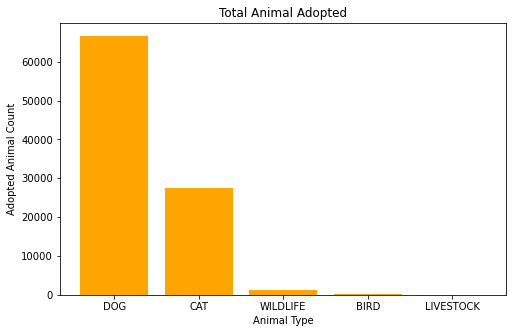

In [35]:
plt.figure(figsize=(8,5))
plt.bar('Animal Type', 'Adopted Total Count', data = merge_pets_total_dallas, color = 'orange')
plt.xlabel('Animal Type')
plt.ylabel('Adopted Animal Count')
plt.title('Total Animal Adopted');

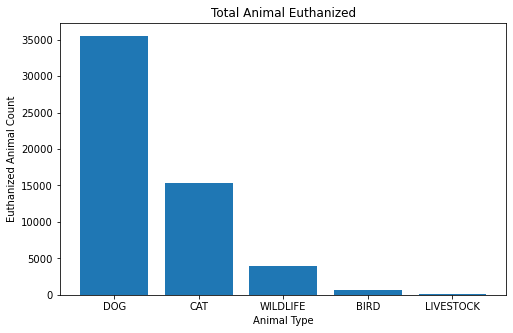

In [36]:
plt.figure(figsize=(8,5))
plt.bar('Animal Type', 'Euthanized Total Count', data = merge_pets_total_dallas)
plt.xlabel('Animal Type')
plt.ylabel('Euthanized Animal Count')
plt.title('Total Animal Euthanized');

In [52]:
merge_dogs_dallas = pd.merge(euth_dog_breed, adopt_dog_breed, on= 'Breeds', how= 'outer')
merge_dogs_dallas['Breeds'] = merge_dogs_dallas['Breeds'].replace(['PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETR', 'CHIHUAHUA SH', 'AMERICAN STAFF','ROTTWEILER', 'BOXER', 'CHOW CHOW', 'AUST CATTLE DOG', 'CAIRN TERRIER', 'ALASKAN HUSKY','BORDER COLLIE','DACHSHUND' ],
                                                                  ['Pit Bull', 'German Shepherd', 'Labrador Retriever', 'Chihuahua Shorthair', 'American Staffordshire', 'Rottweiler', 'Boxer', 'Chow Chow', 'Australian Cattle Dog', 'Cairn Terrier', 'Siberian Husky', 'Border Collie', 'Dachshund'])
#merge_dogs_dallas['Euthanized Breed Count'] = merge_dogs_dallas['Euthanized Breed Count'].astype(int)
merge_dogs_dallas.head(15)

,Breeds,Euthanized Breed Count,Adopted Breed Count
0,Pit Bull,13653.0,14247
1,German Shepherd,4800.0,8749
2,Labrador Retriever,4778.0,10315
3,Chihuahua Shorthair,2585.0,7851
4,American Staffordshire,1008.0,1019
5,Rottweiler,797.0,1049
6,Boxer,571.0,1162
7,Chow Chow,497.0,235
8,Australian Cattle Dog,430.0,1283
9,Cairn Terrier,322.0,1753


In [49]:
merge_dogs_dallas.dtypes

Breeds                     object
Euthanized Breed Count    float64
Adopted Breed Count         int64
dtype: object

In [50]:
#adopted dogs by year
merge_pets_year_dallas = pd.merge(adopt_pets_year, euth_pets_year, on= ('Year', 'Animal Type'), how= 'outer')
merge_pets_year_dallas

,Year,Animal Type,Adopted Animal Count,Euthanized Animal Count
0,2015,DOG,6849,9312
1,2016,DOG,7267,7406
2,2017,DOG,8615,5915
3,2018,DOG,10363,4706
4,2019,DOG,12068,3556
5,2020,DOG,8536,1290
6,2021,DOG,6506,1273
7,2022,DOG,6444,2064


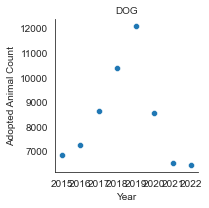

In [40]:
sns.set_style('white')
m = sns.FacetGrid(merge_pets_year_dallas, col='Animal Type')
m.map_dataframe(sns.scatterplot, x='Year', y= 'Adopted Animal Count')
m.set_titles(col_template='{col_name}');

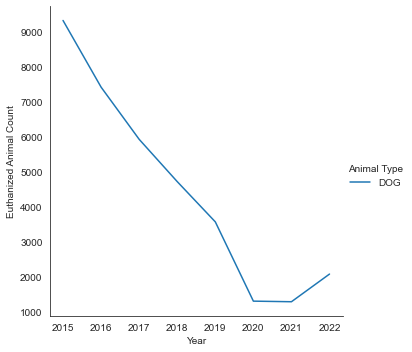

In [41]:
sns.relplot(data = merge_pets_year_dallas, x = 'Year', y = 'Euthanized Animal Count', kind = 'line', hue = 'Animal Type');

In [42]:
merge_pets_total_dallas.to_csv('../data/merge_pets_total_dallas.csv', index=False)

In [53]:
merge_dogs_dallas.to_csv('../data/merge_dogs_dallas.csv', index= False)

In [44]:
merge_pets_year_dallas.to_csv('../data/merge_pets_year_dallas.csv', index=False)